# **Step 1: Data Preprocessing**
    1.1. Import libraries
    1.2. Import Datasets
    1.3. Check for missing data.
    1.4. Split the dataset to fit and train the model.
    1.5. Feature scaling (in case it is needed).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing Data set
df = pd.read_csv('/Users/alberto/Documents/Coding/7_DataScience_ML_projects/Linear_Regression/1_Simple_Linear_regression/data/studentscores.csv')
df.iloc[:5]

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
# Checking missing data
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [3]:
# Splitting the data
X = df.drop(columns='Scores')
Y = df['Scores']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.25, random_state = 0)

# **Step 2: Fitting Simple Linear Regression Model to the training set**

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

# **Step 3: Predecting the Result**

In [5]:
Y_pred = regressor.predict(X_test)

# **Step 4: Visualization**

## Training results

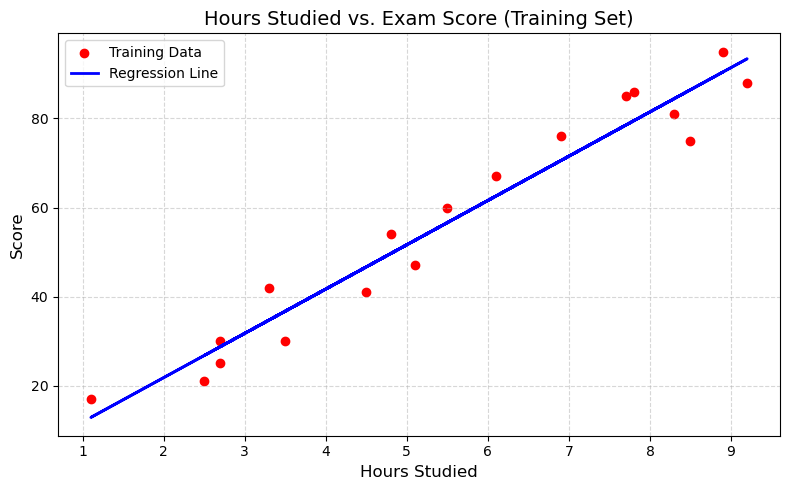

In [6]:
# Plotting the training data with regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_train, Y_train, color='red', label='Training Data')
plt.plot(X_train, regressor.predict(X_train), color='blue', linewidth=2, label='Regression Line')

plt.title('Hours Studied vs. Exam Score (Training Set)', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout();
plt.savefig('/Users/alberto/Documents/Coding/7_DataScience_ML_projects/Linear_Regression/1_Simple_Linear_regression/Images/training_results.png', dpi=300);

## Testing results

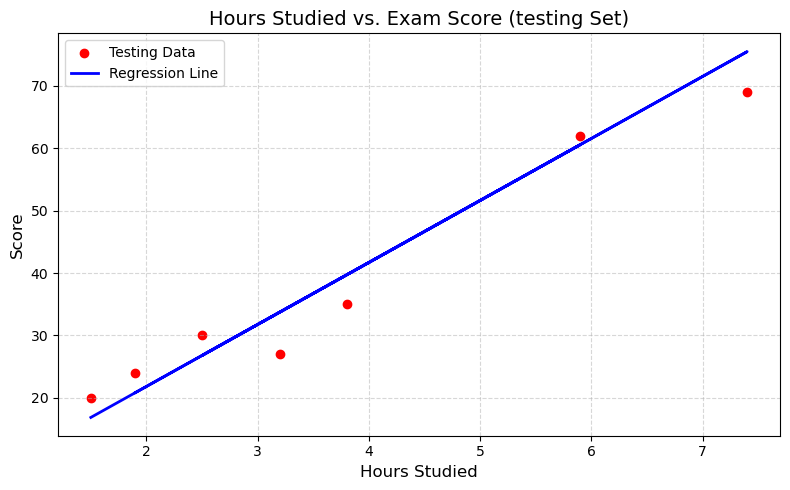

In [7]:
# Plotting the testing data with regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test , Y_test, color = 'red', label='Testing Data')
plt.plot(X_test , regressor.predict(X_test), color='blue', linewidth=2, label='Regression Line')

plt.title('Hours Studied vs. Exam Score (testing Set)', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout();
plt.savefig('/Users/alberto/Documents/Coding/7_DataScience_ML_projects/Linear_Regression/1_Simple_Linear_regression/Images/testing_results.png', dpi=300);

# **Conclusion** 

    1. Red dots: actual data points from your test set (X_test, Y_test).
    2. Blue line: predicted values from your trained model (regressor.predict(X_test)).

It can be noticed that the red dots closely follow the blue line. This means the model’s predictions are very close to the actual test values, therefore, there’s a strong linear relationship between X and Y. Then, it can be concluded that the linear regression model performs well on the test data. It's generalising correctly, with low error and a strong linear fit.

# **Extra steps for deeper understanding**

    1. Calculate metrics like R² score, MAE, or MSE.
    2. Interpret the results.

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating the metrics (from the predicted values in Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred) 

# Printing the results
print(f'The mean absolute error (MAE) is: {np.around(mae, 2)}')
print(f'The mean squared error (MSE) is: {np.around(mse, 2)}')
print(f'The Coefficient of determination (R² Score) is: {np.around(r2, 2)}')

The mean absolute error (MAE) is: 4.13
The mean squared error (MSE) is: 20.33
The Coefficient of determination (R² Score) is: 0.94


# **Definition**
1. Mean Absolute Error (MAE): The average amount your model is wrong. It tells you, on average, how far off the predictions are from the actual values. The lower, the better. It measures the average size of the error, without caring if it's above or below.

***NOTE: “On average, how much do I miss by?”***

2. Mean Squared Error (MSE): Like MAE, but it squares the errors, so bigger mistakes count more. It helps catch large errors and makes them matter more in the total. The lower, the better.

***NOTE: “Are some of my mistakes really big?”***

3. R² Score (Coefficient of Determination): A number between 0 and 1 that shows how well your model fits the data.

    1 means perfect predictions.
    0 means it’s no better than guessing.

***NOTE: “How much of the data trend does my model understand?”***

# **Interpretation**
1. Mean Absolute Error (MAE): 4.13
On average, your model’s predictions are off by about 4.13 units from the real values, which is quite good if your values range up to 70+ (as in your plot).

2. Mean Squared Error (MSE): 20.33
Like MAE, but it squares the errors, so it penalises bigger mistakes more. It tells you how bad your model is when it makes large errors. 20.33 means the errors are quite small overall.

3. R² Score: 0.94
This tells how much of the variation in the data your model explains. 0.94 is excellent — your model explains 94% of the variance in the data.

# **Conclusion**
Your model is very accurate. It makes small mistakes (on average ~4 units), rarely makes large errors, and explains almost all the trends in your data.